<a href="https://colab.research.google.com/github/demie20/Cascade_hackathon-/blob/model2/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display_html
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression


In [ ]:
ds_train= pd.read_csv('/train.csv')
ds_test= pd.read_csv('/test.csv')

In [ ]:
ds_train.loc[:, 'id'] = range(1, len(ds_train) + 1)

start = ds_train['id'].max() + 1
stop = start + len(ds_test)
ds_test.loc[:, 'id'] = range(start, stop)

In [ ]:
df = pd.concat([ds_train, ds_test], ignore_index=True, sort=False)

In [ ]:
df.columns[:3]

Index(['order_time', 'order_id', 'order_date'], dtype='object')

In [ ]:
def convert(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

In [ ]:
columns = [convert(col) for col in df.columns]
df.columns = columns

In [ ]:
df.loc[:4]

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time,id
0,1/26/2021 2:21,556753,1/26/2021 0:00,1/26/2021 2:21,1/26/2021 2:22,1/26/2021 2:32,1/26/2021 2:49,11696.0,1.5666,2.65,46.0,46.0,0.0,0.0,621.0,NaN,NaN,NaN,NaN,NaN,1
1,1/26/2021 2:33,556754,1/26/2021 0:00,1/26/2021 2:33,1/26/2021 2:34,1/26/2021 2:50,1/26/2021 3:11,18117.0,2.5207,2.76,8.0,8.0,0.0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN,2
2,1/26/2021 2:39,556755,1/26/2021 0:00,1/26/2021 2:39,1/26/2021 2:40,1/26/2021 2:56,1/26/2021 3:12,18623.0,2.2074,4.80,1.0,1.0,0.0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN,3
3,1/26/2021 2:47,556756,1/26/2021 0:00,1/26/2021 2:48,1/26/2021 2:49,1/26/2021 3:21,1/26/2021 3:41,15945.0,2.1894,6.38,1.0,1.0,0.0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN,4
4,1/26/2021 3:06,556757,1/26/2021 0:00,1/26/2021 3:07,1/26/2021 3:07,1/26/2021 3:31,1/26/2021 4:00,17589.0,2.7870,4.01,34.0,34.0,0.0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN,5


In [ ]:
df.shape

(426928, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426928 entries, 0 to 426927
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_time            426928 non-null  object 
 1   order_id              426928 non-null  int64  
 2   order_date            426928 non-null  object 
 3   allot_time            426928 non-null  object 
 4   accept_time           426753 non-null  object 
 5   pickup_time           280482 non-null  object 
 6   delivered_time        278699 non-null  object 
 7   rider_id              426927 non-null  float64
 8   first_mile_distance   426927 non-null  float64
 9   last_mile_distance    426927 non-null  float64
 10  alloted_orders        411745 non-null  float64
 11  delivered_orders      411372 non-null  float64
 12  cancelled             282083 non-null  float64
 13  undelivered_orders    411372 non-null  float64
 14  lifetime_order_count  426113 non-null  float64
 15  

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,426928.0,324513.190271,193220.097053,0.0,106731.750000,381378.5000,488110.250000,594842.000000
rider_id,426927.0,7201.138818,5488.687617,0.0,2502.000000,5949.0000,10954.000000,21566.000000
first_mile_distance,426927.0,1.264153,0.852223,0.0,0.578700,1.1824,1.892900,54.690200
last_mile_distance,426927.0,2.936712,1.883773,0.0,1.430000,2.6300,4.200000,22.410000
alloted_orders,411745.0,104.782807,89.627089,1.0,37.000000,82.0000,147.000000,565.000000
delivered_orders,411372.0,104.097012,89.131296,1.0,36.000000,81.0000,146.000000,560.000000
cancelled,282083.0,0.012000,0.108886,0.0,0.000000,0.0000,0.000000,1.000000
undelivered_orders,411372.0,0.779433,1.075937,0.0,0.000000,0.0000,1.000000,10.000000
lifetime_order_count,426113.0,854.663516,1511.906719,0.0,162.000000,395.0000,949.000000,30469.000000
reassigned_order,13429.0,1.000000,0.000000,1.0,1.000000,1.0000,1.000000,1.000000


In [ ]:
df.isnull().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                175
pickup_time             146446
delivered_time          148229
rider_id                     1
first_mile_distance          1
last_mile_distance           1
alloted_orders           15183
delivered_orders         15556
cancelled               144845
undelivered_orders       15556
lifetime_order_count       815
reassignment_method     413510
reassignment_reason     413499
reassigned_order        413499
session_time              7390
cancelled_time          423543
id                           0
dtype: int64

In [ ]:
nan_replacements = {"accept_time:": 0.,"pickup_time": 0., "delivered_time": 0, "cancelled": 0}
full_data_cln = df.fillna(nan_replacements)

# Some rows contain entreis with 0 adults, 0 children and 0 babies. 
# I'm dropping these entries with no guests.
zero_guests = list(full_data_cln.loc[full_data_cln["Adults"]
                   + full_data_cln["Children"]
                   + full_data_cln["Babies"]==0].index)
full_data_cln.drop(full_data_cln.index[zero_guests], inplace=True)

NameError: ignored

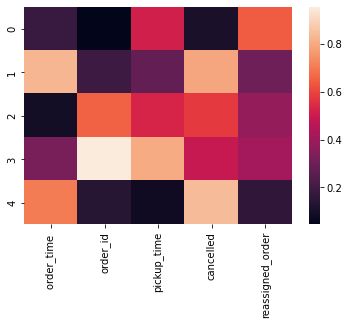

In [ ]:
df = pd.DataFrame(np.random.random((5,5)), columns=["order_time ","order_id","pickup_time","cancelled","reassigned_order"])

# Default heatmap
p1 = sns.heatmap(df)

In [ ]:
bestfeatures = SelectKBest(score_func=f_regression, k="all")

In [18]:
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

NameError: ignored